In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
#Define the path to the dataset
base_dir = "final_symbols_split_ttv"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

#Split the data into train, validation and test sets
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

#Create the train, validation and test sets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=128, color_mode='grayscale', class_mode="categorical")
validation_generator = validation_datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=128, color_mode='grayscale', class_mode="categorical")
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=128, color_mode='grayscale', class_mode="categorical")

Found 42749 images belonging to 14 classes.
Found 5337 images belonging to 14 classes.
Found 5356 images belonging to 14 classes.


#Create the CNN model

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(2,2), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(150, 150, 1)))
model.add(Conv2D(64, (3, 3), strides=(2,2), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(14, activation='softmax'))

#Compile and train the model


In [11]:
decayed_lr = tf.keras.optimizers.schedules.ExponentialDecay(
                        initial_learning_rate=1e-3,
                        decay_steps = 1000,
                        decay_rate=0.95,
                        staircase=False)

model.compile(loss='categorical_crossentropy', optimizer=Adam(decayed_lr, amsgrad=True), metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
334/334 [==============================] - 81s 239ms/step - loss: 0.9783 - accuracy: 0.6920 - val_loss: 0.2902 - val_accuracy: 0.9187
Epoch 2/20
334/334 [==============================] - 77s 231ms/step - loss: 0.3834 - accuracy: 0.8820 - val_loss: 0.2076 - val_accuracy: 0.9369
Epoch 3/20
334/334 [==============================] - 79s 236ms/step - loss: 0.2830 - accuracy: 0.9106 - val_loss: 0.1690 - val_accuracy: 0.9515
Epoch 4/20
334/334 [==============================] - 77s 230ms/step - loss: 0.2231 - accuracy: 0.9280 - val_loss: 0.1536 - val_accuracy: 0.9550
Epoch 5/20
334/334 [==============================] - 79s 237ms/step - loss: 0.1966 - accuracy: 0.9359 - val_loss: 0.1307 - val_accuracy: 0.9623
Epoch 6/20
334/334 [==============================] - 76s 228ms/step - loss: 0.1382 - accuracy: 0.9535 - val_loss: 0.1242 - val_accuracy: 0.9666
Epoch 8/20
334/334 [==============================] - 78s 235ms/step - loss: 0.1181 - accuracy: 0.9603 - val_loss: 0.1220 - val_ac

#Evaluate the model

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy: ", test_acc)

42/42 [==============================] - 8s 198ms/step - loss: 0.1080 - accuracy: 0.9770
Test accuracy:  0.9770351052284241


# Saving the model

In [ ]:
model.save("model_new2.h5")

#Plot the accuracy and loss curves

In [29]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history
# Save it under the form of a json file
json.dump(history_dict, open('his.json', 'w'))

In [6]:
from matplotlib import font_manager
import matplotlib.pyplot as plt
%matplotlib inline

font_path = 'C:\\Users\\amita\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NewCM10-Regular.otf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [7]:
import json
history = json.load(open('final_codebase/his.json', 'r'))

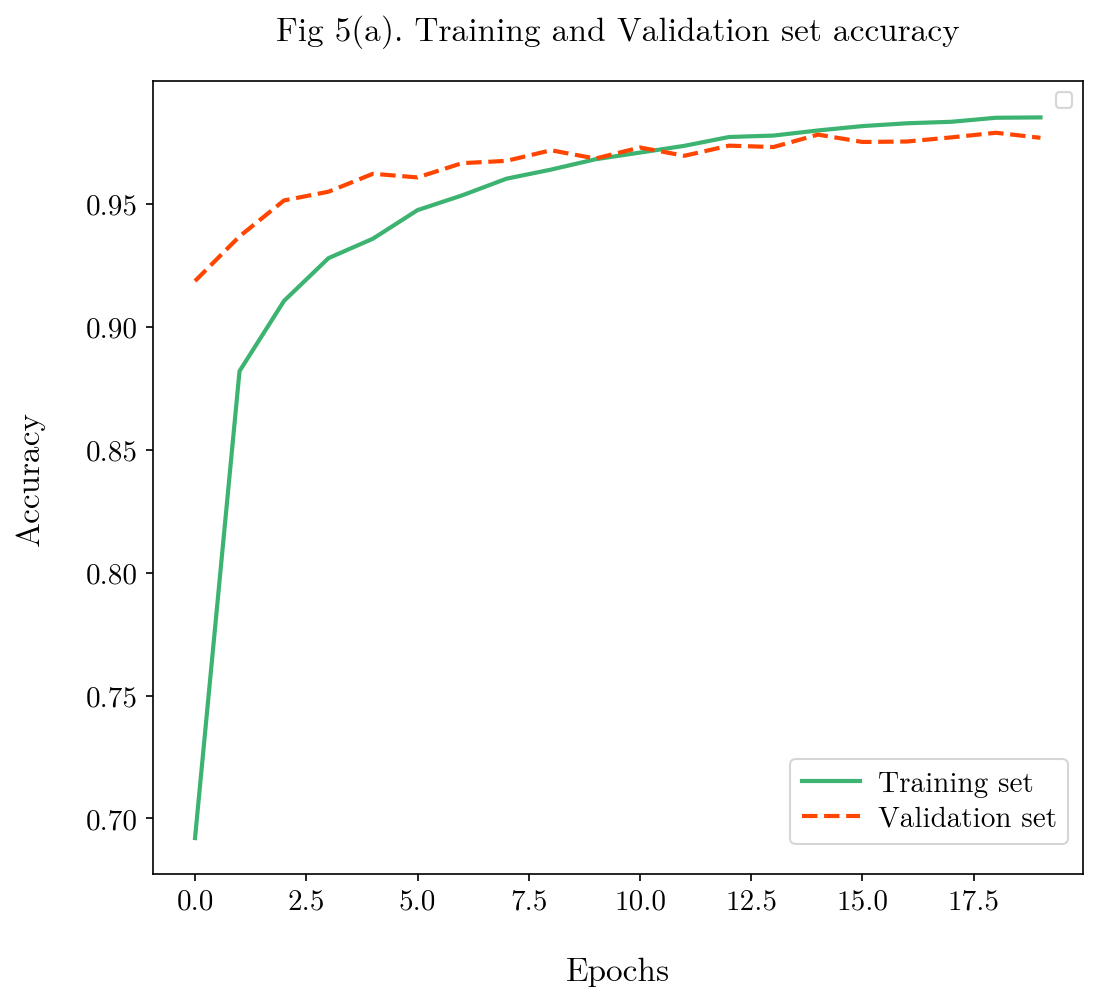

In [8]:
plt.figure(figsize=(8,7), dpi=150)
acc = history['accuracy']
val_acc = history['val_accuracy']

epochs = range(len(acc))
plt.plot(epochs, acc, label='Training set', color='mediumseagreen', linestyle='-', lw=2)
plt.plot(epochs, val_acc, label='Validation set', color='orangered', linestyle='--', lw=2)
plt.title('Fig 5(a). Training and Validation set accuracy', fontsize=16, pad=20)
plt.legend([])

plt.xlabel('Epochs', fontsize=16, labelpad=20)
plt.ylabel('Accuracy', fontsize=16, labelpad=20)
plt.tick_params(labelsize=14)

plt.figlegend(loc='lower right', ncol=1, labelspacing=0.3,
              title_fontsize=16, fontsize=14, bbox_to_anchor=(0.9, 0.14), 
              handletextpad=0.6, frameon=True)
plt.show()

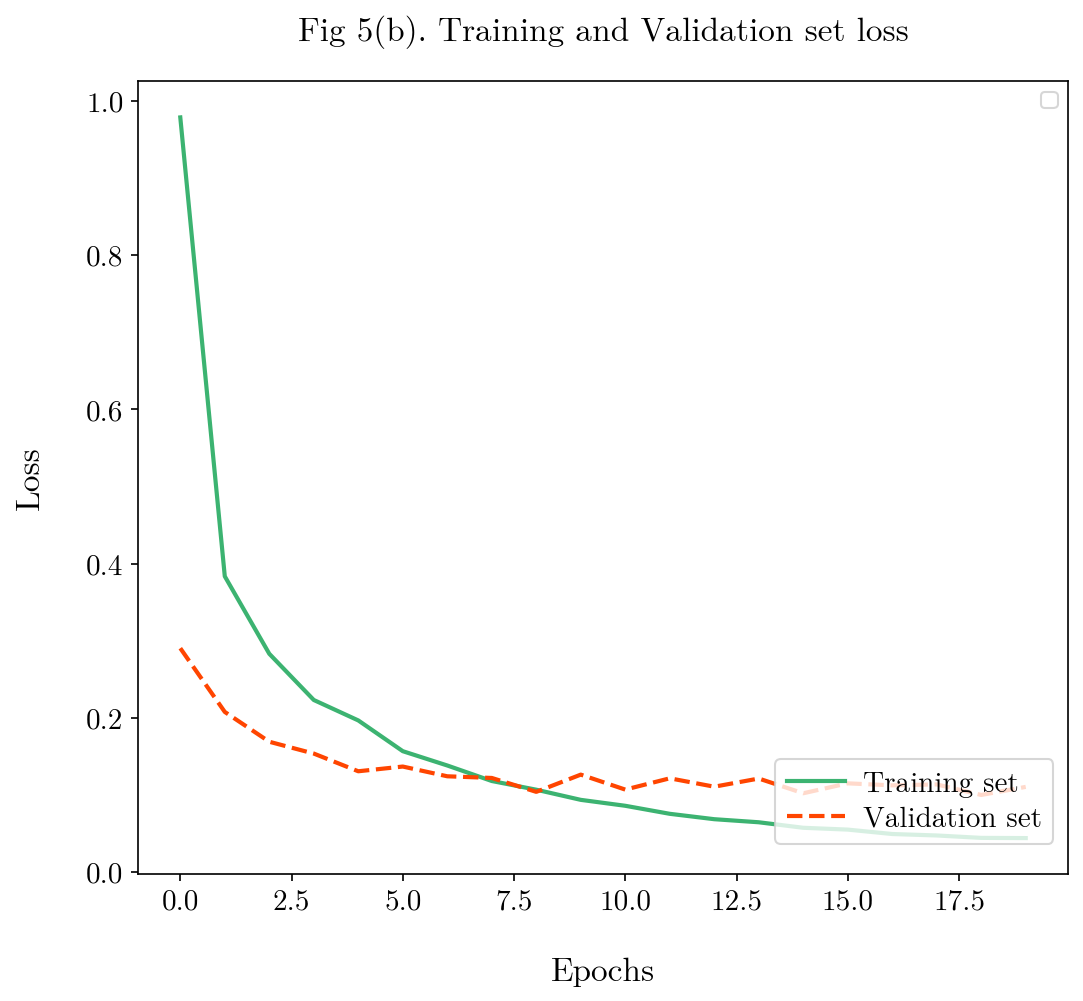

In [9]:
plt.figure(figsize=(8,7), dpi=150)
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, label='Training set', color='mediumseagreen', linestyle='-', lw=2)
plt.plot(epochs, val_loss, label='Validation set', color='orangered', linestyle='--', lw=2)
plt.title('Fig 5(b). Training and Validation set loss', fontsize=16, pad=20)

plt.legend([])

plt.xlabel('Epochs', fontsize=16, labelpad=20)
plt.ylabel('Loss', fontsize=16, labelpad=20)
plt.tick_params(labelsize=14)

plt.figlegend(loc='lower right', ncol=1, labelspacing=0.3,
              title_fontsize=16, fontsize=14, bbox_to_anchor=(0.9, 0.14), 
              handletextpad=0.6, frameon=True)
plt.show()